# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

# Creating the dataframe

In [3]:
adult_census_income_df = pd.read_csv("../dataset/adult.csv")
df = adult_census_income_df.copy()

In [4]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [5]:
df.shape

(32561, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df["salary"].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [10]:
df["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [12]:
df["country"].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [13]:
df["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
df["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

# Conclution

### No need columns
education
fnlwgt

### Country-workclass-Occupation columns
We have unwanted "?" we have to replace it by its nearest value.

## Droping the Education - education num is enough and drop fnlwgt which highly descrete value

In [21]:
df = adult_census_income_df.copy()
df = df.drop(["education", "fnlwgt"], axis=1)
df.head(2)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [22]:
df.head(2)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


## Replaceing ? with NaN

In [23]:
df.replace('?', np.NaN, inplace=True)

In [24]:
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Replacing NaN with forward fill

In [29]:
df.fillna(method='ffill', inplace=True)

## Label Encoding 

We are converting each column value into number to give our model

In [32]:
from sklearn.preprocessing import LabelEncoder

descrete_and_not_need_column = ["age", "marital-status", "capital-gain", "capital-loss", "hours-per-week"]

le = LabelEncoder()

for column in df.columns:
    if column in descrete_and_not_need_column:
        continue
    else:
        df[column] = le.fit_transform(df[column])

<AxesSubplot: xlabel='salary', ylabel='age'>

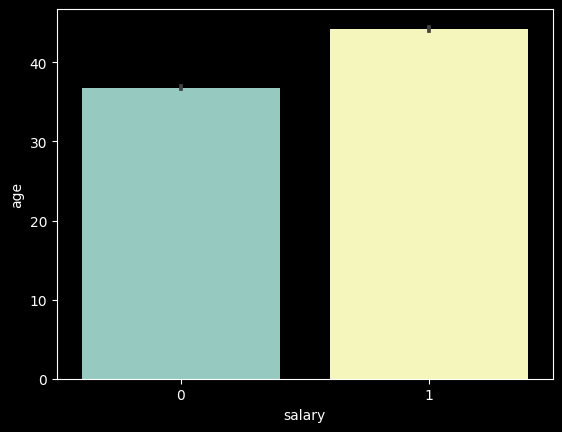

In [33]:
sns.barplot(x="salary", y="age", data=df)

/tmp/ipykernel_8905/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

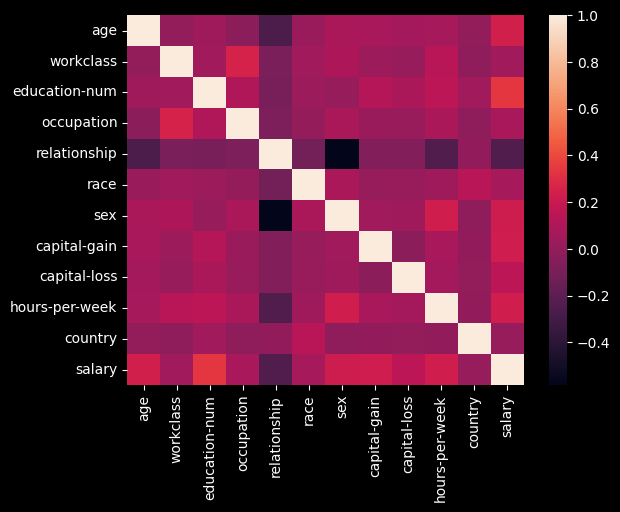

In [34]:
sns.heatmap(df.corr())

## Observaltion

highly corelated columns
- age 
- education-num
- sex
- hours-per-week

Split into X and Y dataset

In [76]:
X = df.drop(["salary", "marital-status"], axis=1)
y = df["salary"]

## Train Test Split

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [82]:
from  sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = [
    ("Naive-Baiys", GaussianNB()),
    ("Logistic-Clf", LogisticRegression())
]

for name, model in models:
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print(name, "-"*100)
    print(f"Classification Report: {classification_report(y_predict, y_test)}")
    print(f"Confusion Metrix: {confusion_matrix(y_predict, y_test)}")
    print(f"Accuracy score: {accuracy_score(y_predict, y_test)}")

Naive-Baiys ----------------------------------------------------------------------------------------------------
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.81      0.88      5780
           1       0.32      0.68      0.43       733

    accuracy                           0.80      6513
   macro avg       0.63      0.75      0.65      6513
weighted avg       0.88      0.80      0.83      6513

Confusion Metrix: [[4697 1083]
 [ 234  499]]
Accuracy score: 0.7977890373099954
Logistic-Clf ----------------------------------------------------------------------------------------------------
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.82      0.88      5718
           1       0.34      0.68      0.45       795

    accuracy                           0.80      6513
   macro avg       0.64      0.75      0.67      6513
weighted avg       0.87      0.80      0.83     

/home/cat/Desktop/ML/Adult-Census-Income-Prediction/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
y_train.head()

1049     1
31603    0
29587    1
9784     0
26205    0
Name: salary, dtype: int64

In [73]:
clf = GaussianNB()

In [75]:
clf.fit(X_train.drop(["marital-status"], axis=1), y_train)

GaussianNB()